<a href="https://colab.research.google.com/github/lin3372/600_graph_neural_net/blob/main/books/Graph_Machine_Learning/pdf/01_02_Graph_Drawing_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plot Graphs

In [ ]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='red', arrowsize=30, node_color='green', alpha=0.5)
    # orig: nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=16)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=12)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Graph Drawing - Simple

### Simple Graph Drawing

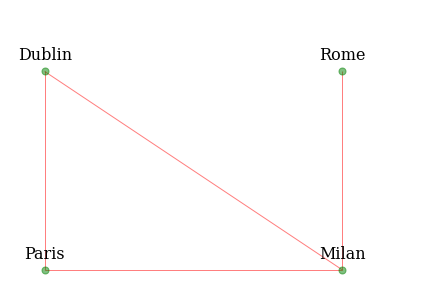

In [ ]:
G = nx.Graph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [('Paris','Dublin', 11), ('Paris','Milan', 8), ('Milan','Rome', 5), ('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
node_position = {"Paris": [0,0], "Dublin": [0,1], "Milan":[1,0], "Rome": [1,1]}
draw_graph(G, node_position, True)

## Graph Drawing - More Styles

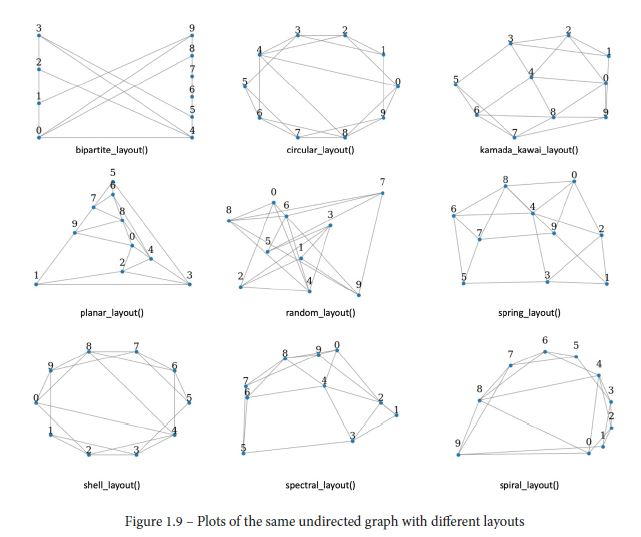

### Graph Definition

In [ ]:
G = nx.Graph()
nodes_left = {0, 1, 2, 3}
nodes_right = {4, 5, 6, 7, 8, 9}
E01 = [(0,2,2), (0,4,4), (0,8,8), (0,9,9), (1,2,3), (1,3,4), (1,9,10)]
E23 = [(2,0,2), (2,1,3), (2,3,5), (2,4,6), (3,1,4), (3,2,5), (3,4,7), (3,5,8)]
E45 = [(4,0,4), (4,2,6), (4,3,7), (4,6,10), (4,8,12), (5,3,8), (5,6,11), (5,7,12)]
E67 = [[6,4,10], (6,5,11), (6,7,13), (6,8,14), (7,5,12), (7,6,13), (7,8,15), (7,9,16)]
E89 = [(8,0,8), (8,4,12), (8,6,14), (8,7,15), (8,9,17), (9,0,9), (9,1,10), (9,7,16), (9,8,17)]
E = E01 + E23 + E45 + E67 + E89

G.add_nodes_from(nodes_left, bipartite=0)
G.add_nodes_from(nodes_right, bipartite=1)
G.add_weighted_edges_from(E)

### Bipartite Graph

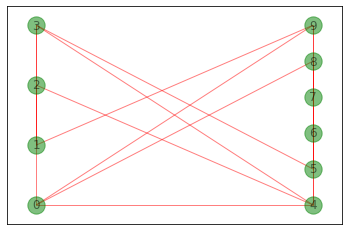

In [ ]:
from networkx.drawing.layout import bipartite_layout
node_pos_bipartite = bipartite_layout(G, nodes_left)
nx.draw_networkx(G, pos=node_pos_bipartite, node_color='green', alpha=0.5, edge_color='red')

### Circular Layout Graph

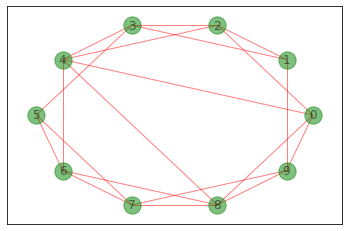

In [ ]:
node_pos_circular = nx.circular_layout(G)
gfx_bipartite = nx.draw_networkx(G, pos=node_pos_circular, node_color='green', alpha=0.5, edge_color='red')

### Force-Directed Drawing (kamada_kawai layout)
Ref - [Lecture 13: Visualization and navigation of graphs (slides)](https://coursepages2.tuni.fi/mttts17/wp-content/uploads/sites/136/2020/04/drv_2020_lecture13.pdf)

Ref - [Force-Directed Drawing Algorithms (CS of Brown U, pdf)](https://cs.brown.edu/people/rtamassi/gdhandbook/chapters/force-directed.pdf)

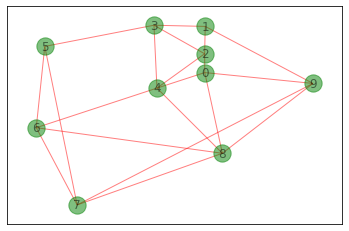

In [ ]:
node_pos_kamada_kawai = nx.kamada_kawai_layout(G)
gfx_forced_directed=nx.draw_networkx(G, pos=node_pos_kamada_kawai, node_color='green', alpha=0.5, edge_color='red')

### Planar Drawing

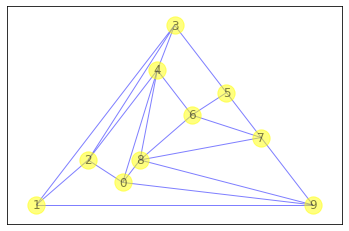

In [ ]:
node_pos_planar = nx.planar_layout(G)
gfx_planar=nx.draw_networkx(G, pos=node_pos_planar, node_color='yellow', alpha=0.5, edge_color='blue')

### Random layout

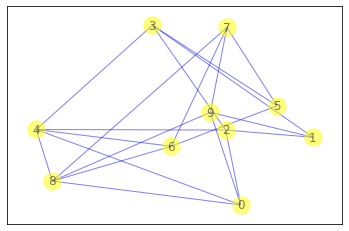

In [ ]:
node_pos_random = nx.random_layout(G)
gfx_random=nx.draw_networkx(G, pos=node_pos_random, node_color='yellow', alpha=0.5, edge_color='blue')

### Spring layout

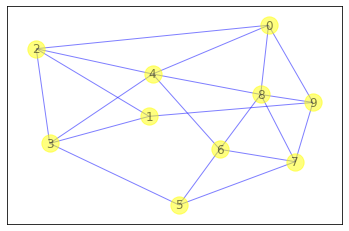

In [ ]:
node_pos_spring = nx.spring_layout(G)
gfx_spring=nx.draw_networkx(G, pos=node_pos_spring, node_color='yellow', alpha=0.5, edge_color='blue')

### Shell Layout

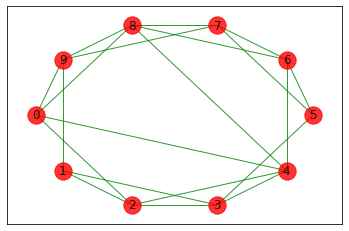

In [ ]:
node_pos_shell = nx.shell_layout(G)
gfx_shell=nx.draw_networkx(G, pos=node_pos_shell, node_color='red', alpha=0.8, edge_color='green')

### Spectral layout

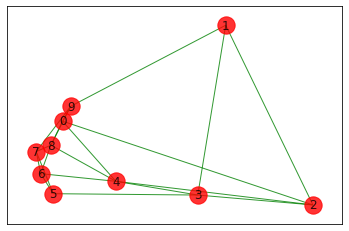

In [ ]:
node_pos_spectral = nx.spectral_layout(G)
gfx_spectral = nx.draw_networkx(G, pos=node_pos_spectral, node_color='red', alpha=0.8, edge_color='green')

### Spiral layout

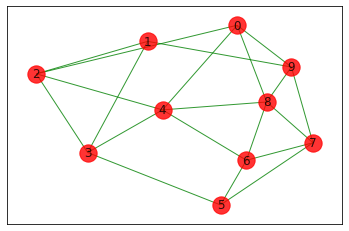

In [ ]:
node_pos_spiral = nx.spring_layout(G)
gfx_spiral = nx.draw_networkx(G, pos=node_pos_spiral, node_color='red', alpha=0.8, edge_color='green')

## Combining all Graph Drawings

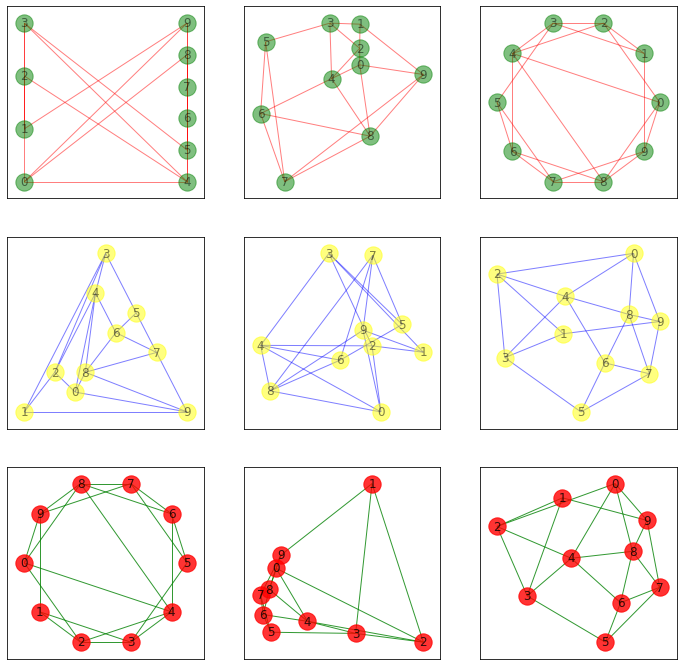

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
gfx_bipartite = nx.draw_networkx(G, pos=node_pos_bipartite, node_color='green', alpha=0.5, edge_color='red')
plt.subplot(3,3,2)
gfx_forced_directed=nx.draw_networkx(G, pos=node_pos_kamada_kawai, node_color='green', alpha=0.5, edge_color='red')
plt.subplot(3,3,3)
gfx_bipartite = nx.draw_networkx(G, pos=node_pos_circular, node_color='green', alpha=0.5, edge_color='red')
plt.subplot(3,3,4)
gfx_planar=nx.draw_networkx(G, pos=node_pos_planar, node_color='yellow', alpha=0.5, edge_color='blue')
plt.subplot(3,3,5)
gfx_random=nx.draw_networkx(G, pos=node_pos_random, node_color='yellow', alpha=0.5, edge_color='blue')
plt.subplot(3,3,6)
gfx_spring=nx.draw_networkx(G, pos=node_pos_spring, node_color='yellow', alpha=0.5, edge_color='blue')
plt.subplot(3,3,7)
gfx_shell=nx.draw_networkx(G, pos=node_pos_shell, node_color='red', alpha=0.8, edge_color='green')
plt.subplot(3,3,8)
gfx_spectral = nx.draw_networkx(G, pos=node_pos_spectral, node_color='red', alpha=0.8, edge_color='green')
plt.subplot(3,3,9)
gfx_spiral = nx.draw_networkx(G, pos=node_pos_spiral, node_color='red', alpha=0.8, edge_color='green')
